<a href="https://colab.research.google.com/github/ArnabSen08/Machine-Learning-Code/blob/main/Kernel_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pip --user -q --no-warn-script-location
!pip install numpy pandas sklearn matplotlib --user -q --no-warn-script-location

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip install pip --user -q --no-warn-script-location
!pip install numpy pandas sklearn matplotlib --user -q --no-warn-script-location


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Wine.csv')

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.shape

(178, 14)

In [6]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [7]:
print("no. of Duplicated values :", df.duplicated().sum())

no. of Duplicated values : 0


In [8]:
df['Customer_Segment'].value_counts(normalize=True)*100

2    39.887640
1    33.146067
3    26.966292
Name: Customer_Segment, dtype: float64

In [9]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [10]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [11]:
X.shape

(178, 13)

In [14]:
from sklearn.decomposition import KernelPCA
Kernel_pca = KernelPCA(n_components=None, kernel="rbf")
Kernel_pca.fit(X)

KernelPCA(kernel='rbf')

In [15]:
Kernel_pca.eigenvalues_[:15]

array([5.4629761 , 2.59410049, 1.14474885, 1.0045011 , 0.75215415,
       0.63482658, 0.49935811, 0.32953626, 0.3143493 , 0.31188344,
       0.19474068, 0.17952501, 0.11888764, 0.0552754 , 0.03547108])

In [16]:
Kernel_pca.eigenvectors_

array([[-0.11243718, -0.0608613 , -0.00938035, ...,  0.04304363,
         0.05295498,  0.05811252],
       [-0.07852089, -0.0029485 ,  0.09622977, ...,  0.00732702,
         0.04453796,  0.01297797],
       [-0.0845691 , -0.0448316 , -0.06811863, ..., -0.03449698,
         0.08340929, -0.00224627],
       ...,
       [ 0.10050711, -0.1266912 ,  0.00747015, ..., -0.01496636,
        -0.01966507, -0.01911387],
       [ 0.0926419 , -0.09918002,  0.03429664, ...,  0.02588707,
         0.01610622,  0.01595527],
       [ 0.11169079, -0.11879346, -0.1007987 , ..., -0.00653419,
        -0.02973879,  0.0073801 ]])

In [17]:
Kernel_pca = KernelPCA(n_components=5, kernel = "rbf")
Kernel_pca.fit(X)

KernelPCA(kernel='rbf', n_components=5)

In [18]:
Kernel_pca.eigenvalues_

array([5.4629761 , 2.59410049, 1.14474885, 1.0045011 , 0.75215415])

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Kernel_pca.transform(X), Y, test_size = 0.20, random_state=100)

In [21]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((142, 5), (142,), (36, 5), (36,))

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

In [23]:
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [24]:
y_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy :", accuracy_score(y_test,y_pred))

Accuracy : 0.9722222222222222


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 8,  0,  0],
       [ 1, 14,  0],
       [ 0,  0, 13]])

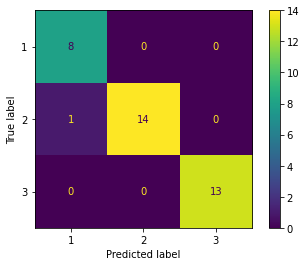

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, x_test,y_test)

In [28]:
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        13

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

